In [2]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime

nL1 = nL2 = 5**2

taum = 10*ms
taue = taui = 5*ms

duration = 500*ms

eqsCUBALIF ='''
dv/dt  = (ge+gi-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taue : volt
'''

tmp = np.array([[1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1]])*200*Hz
light = TimedArray(tmp, dt=duration)
L1 = PoissonGroup(nL1, rates='light(t,i)')
L2 = NeuronGroup(nL2, eqsCUBALIF, threshold='v>0.3*volt', reset='v = 0*volt', refractory=5*ms, method='euler')
sp2 = SpikeMonitor(L2)
statemon = StateMonitor(L2, 'v', record=True)

gain = 100*mV

Ce = Synapses(L1, L2, 'w : volt', on_pre='ge += w')
Ce.connect()
Exc = np.eye(nL2)
Ce.w = Exc.flatten()*8*gain

Ci = Synapses(L1, L2, 'w : volt', on_pre='gi -= w')
Ci.connect()
Inh = np.array([[0,1,0,0,0, 1,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
                [1,0,1,0,0, 1,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
                [0,1,0,1,0, 0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
                [0,0,1,0,1, 0,0,1,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
                [0,0,0,1,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
                
                [1,1,0,0,0, 0,1,0,0,0, 1,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
                [1,1,1,0,0, 1,0,1,0,0, 1,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0],
                [0,1,1,1,0, 0,1,0,1,0, 0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0],
                [0,0,1,1,1, 0,0,1,0,1, 0,0,1,1,1, 0,0,0,0,0, 0,0,0,0,0],
                [0,0,0,1,1, 0,0,0,1,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0],
                
                [0,0,0,0,0, 1,1,0,0,0, 0,1,0,0,0, 1,1,0,0,0, 0,0,0,0,0],
                [0,0,0,0,0, 1,1,1,0,0, 1,0,1,0,0, 1,1,1,0,0, 0,0,0,0,0],
                [0,0,0,0,0, 0,1,1,1,0, 0,1,0,1,0, 0,1,1,1,0, 0,0,0,0,0],
                [0,0,0,0,0, 0,0,1,1,1, 0,0,1,0,1, 0,0,1,1,1, 0,0,0,0,0],
                [0,0,0,0,0, 0,0,0,1,1, 0,0,0,1,0, 0,0,0,1,1, 0,0,0,0,0],
                
                [0,0,0,0,0, 0,0,0,0,0, 1,1,0,0,0, 0,1,0,0,0, 1,1,0,0,0],
                [0,0,0,0,0, 0,0,0,0,0, 1,1,1,0,0, 1,0,1,0,0, 1,1,1,0,0],
                [0,0,0,0,0, 0,0,0,0,0, 0,1,1,1,0, 0,1,0,1,0, 0,1,1,1,0],
                [0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,1, 0,0,1,0,1, 0,0,1,1,1],
                [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,1, 0,0,0,1,0, 0,0,0,1,1],
                
                [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 1,1,0,0,0, 0,1,0,0,0],
                [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 1,1,1,0,0, 1,0,1,0,0],
                [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,1,1,1,0, 0,1,0,1,0],
                [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,1, 0,0,1,0,1],
                [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,1, 0,0,0,1,0]])
Ci.w = Inh.flatten()*gain

run(duration)
mfr = sp2.count/duration
mfr.reshape(5,5)

array([[68., 46., 66., 48., 84.],
       [64.,  0.,  0.,  0.,  0.],
       [68.,  0.,  0.,  0.,  0.],
       [52.,  0.,  0.,  0.,  0.],
       [62., 58., 70., 72., 56.]]) * hertz

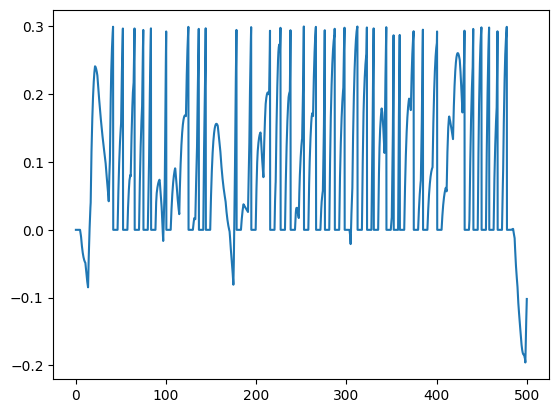

In [4]:
plot(statemon.t/ms, statemon.v[0])